In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn  as sns
import geopandas as gpd
import fiona
import shapely
import matplotlib as mpl
from statannotations.Annotator import Annotator
from statannotations.stats.StatTest import StatTest
import pickle
from shapely.geometry import Point, MultiPoint
import scipy
from shapely import wkt
import statsmodels.api as sm


In [2]:
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt.rcParams.update({'font.size': 16})

#### Load dataset

In [3]:
# import dataframe
df=pd.read_csv("../Data/Data_S4.csv")

In [4]:
df['geometry'] = df['geometry'].apply(wkt.loads)


In [5]:
# trasform into geodataframe
gdf = gpd.GeoDataFrame(
    df,
    geometry="geometry",
    crs="EPSG:3035"  # Set CRS to EPSG:3035
)


#### Plots and statistical analysis

##### Association with population

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

No vs. Yes: T Test, P_val:0.000e+00 Stat=-4.950e+01


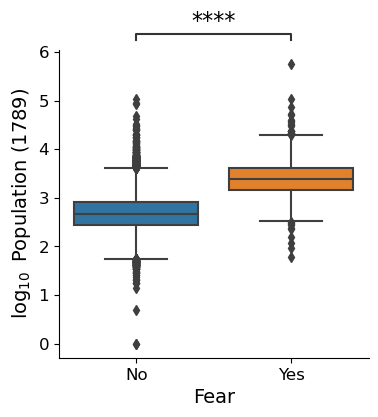

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax=sns.boxplot(data=gdf, x="Fear", y="logP")
pairs=[("Yes","No")]
annotator = Annotator(ax, pairs, data=gdf, x="Fear", y="logP", order=["No","Yes"])
# Required descriptors for annotate
custom_long_name = 'T Test'
custom_short_name = 'T Test'
custom_func = scipy.stats.ttest_ind
custom_test = StatTest(custom_func, custom_long_name, custom_short_name)
annotator.configure(test=custom_test, text_format='star', loc='outside')
annotator.apply_and_annotate()
plt.ylabel(r"$\log_{10}$ Population (1789)")
plt.show()

##### Association with population: restricted to towns (more than 2000 inhabitants)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

No vs. Yes: T Test, P_val:3.396e-37 Stat=-1.299e+01


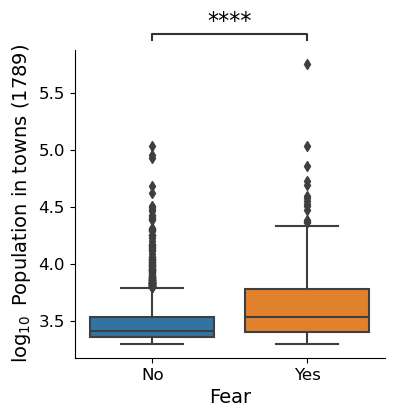

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax=sns.boxplot(data=gdf[gdf.Town], x="Fear", y="logP", order=["No","Yes"])
pairs=[("No","Yes")]
annotator = Annotator(ax, pairs, data=gdf[gdf.Town], x="Fear", y="logP", order=["No","Yes"])
# Required descriptors for annotate
custom_long_name = 'T Test'
custom_short_name = 'T Test'
custom_func = scipy.stats.ttest_ind
custom_test = StatTest(custom_func, custom_long_name, custom_short_name)
annotator.configure(test=custom_test, text_format='star', loc='outside')
annotator.apply_and_annotate()
plt.ylabel(r"$\log_{10}$ Population in towns (1789)")
plt.show()

##### Plot map

In [28]:
# import outline
fr_outline=gpd.read_file("../Maps/france_outline")

(2100000.0, 3200000.0)

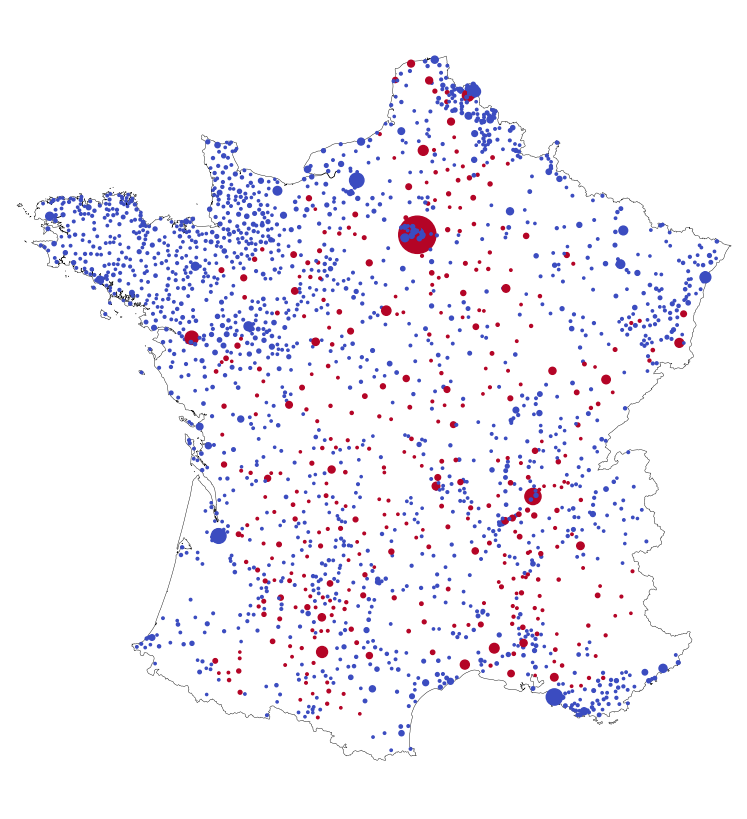

In [26]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
fr_outline.plot(facecolor="white", edgecolor='black', lw=0.3, ax=ax)
gdf[gdf.Town].plot(column="Fear", marker=".", ax=ax, cmap="coolwarm", s=gdf[gdf.Town]['poptot']/200)
plt.xlim(0.32e7,0.42e7)
plt.ylim(2.1e6,3.2e6)

##### Correlation with the participation in the 1789 referendum

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

No vs. Yes: T Test, P_val:1.720e-01 Stat=1.366e+00


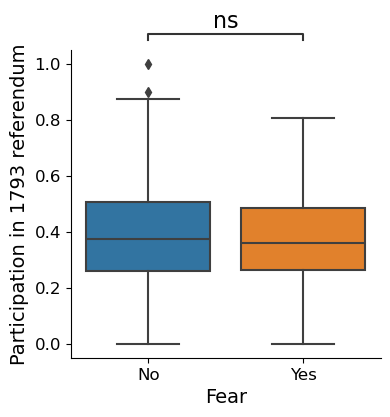

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax=sns.boxplot(data=gdf, x="Fear", y="ppar")
pairs=[("Yes","No")]
annotator = Annotator(ax, pairs, data=gdf, x="Fear", y="ppar", order=["No","Yes"])
# Required descriptors for annotate
custom_long_name = 'T Test'
custom_short_name = 'T Test'
custom_func = scipy.stats.ttest_ind
custom_test = StatTest(custom_func, custom_long_name, custom_short_name)
annotator.configure(test=custom_test, text_format='star', loc='outside')
annotator.apply_and_annotate()
plt.ylabel(r"Participation in 1793 referendum")
plt.show()

##### Correlation with the participation in the 1789 referendum (towns with more than 2000 inhabitants)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

No vs. Yes: T Test, P_val:1.443e-02 Stat=-2.448e+00


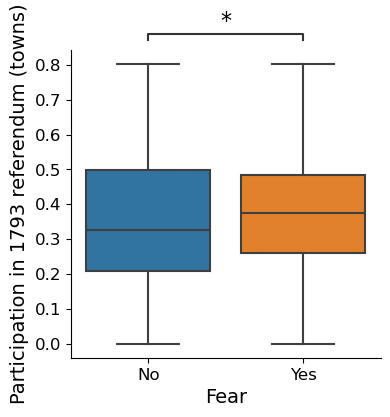

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax=sns.boxplot(data=gdf[gdf.Town], x="Fear", y="ppar", order=["No","Yes"])
pairs=[("Yes","No")]
annotator = Annotator(ax, pairs, data=gdf[gdf.Town], x="Fear", y="ppar", order=["No","Yes"])
# Required descriptors for annotate
custom_long_name = 'T Test'
custom_short_name = 'T Test'
custom_func = scipy.stats.ttest_ind
custom_test = StatTest(custom_func, custom_long_name, custom_short_name)
annotator.configure(test=custom_test, text_format='star', loc='outside')
annotator.apply_and_annotate()
plt.ylabel(r"Participation in 1793 referendum (towns)")
plt.show()

##### Association with literacy

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

No vs. Yes: T Test, P_val:6.681e-30 Stat=-1.137e+01


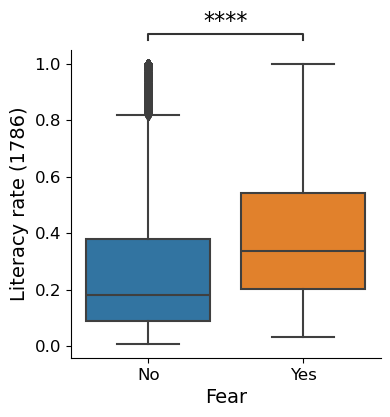

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax=sns.boxplot(data=gdf, x="Fear", y="% signed")
pairs=[("Yes","No")]
annotator = Annotator(ax, pairs, data=gdf, x="Fear", y="% signed")
# Required descriptors for annotate
custom_long_name = 'T Test'
custom_short_name = 'T Test'
custom_func = scipy.stats.ttest_ind
custom_test = StatTest(custom_func, custom_long_name, custom_short_name)
annotator.configure(test=custom_test, text_format='star', loc='outside')
annotator.apply_and_annotate()
plt.ylabel("Literacy rate (1786)")
plt.show()

##### Association with literacy (towns with more than 2000 inhabitants)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Yes vs. No: T Test, P_val:1.713e-07 Stat=5.245e+00


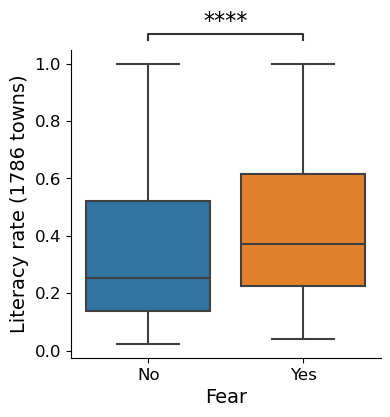

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax=sns.boxplot(data=gdf[gdf.Town], x="Fear", y="% signed", order=["No","Yes"])
pairs=[("Yes","No")]
annotator = Annotator(ax, pairs, data=gdf[gdf.Town], x="Fear", y="% signed")
# Required descriptors for annotate
custom_long_name = 'T Test'
custom_short_name = 'T Test'
custom_func = scipy.stats.ttest_ind
custom_test = StatTest(custom_func, custom_long_name, custom_short_name)
annotator.configure(test=custom_test, text_format='star', loc='outside')
annotator.apply_and_annotate()
plt.ylabel("Literacy rate (1786 towns)")
plt.show()

##### Association with income

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

No vs. Yes: T Test, P_val:6.293e-02 Stat=-1.860e+00


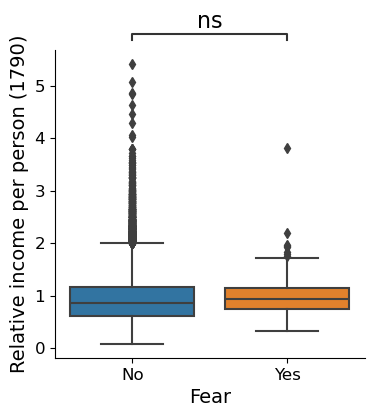

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax=sns.boxplot(data=gdf, x="Fear", y="revratio1790", order=["No","Yes"])
pairs=[("Yes","No")]
annotator = Annotator(ax, pairs, data=gdf, x="Fear", y="revratio1790")
# Required descriptors for annotate
custom_long_name = 'T Test'
custom_short_name = 'T Test'
custom_func = scipy.stats.ttest_ind
custom_test = StatTest(custom_func, custom_long_name, custom_short_name)
annotator.configure(test=custom_test, text_format='star', loc='outside')
annotator.apply_and_annotate()
plt.ylabel("Relative income per person (1790)")
plt.show()

##### Association with income (towns of more than 2000 inhabitants)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Yes vs. No: T Test, P_val:1.809e-05 Stat=4.297e+00


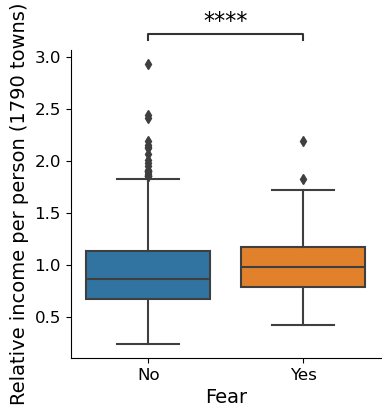

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax=sns.boxplot(data=gdf[gdf.Town], x="Fear", y="revratio1790", order=["No","Yes"])
pairs=[("Yes","No")]
annotator = Annotator(ax, pairs, data=gdf[gdf.Town], x="Fear", y="revratio1790")
# Required descriptors for annotate
custom_long_name = 'T Test'
custom_short_name = 'T Test'
custom_func = scipy.stats.ttest_ind
custom_test = StatTest(custom_func, custom_long_name, custom_short_name)
annotator.configure(test=custom_test, text_format='star', loc='outside')
annotator.apply_and_annotate()
plt.ylabel("Relative income per person (1790 towns)")
plt.show()

##### Association with ownership

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

No vs. Yes: T Test, P_val:7.466e-84 Stat=1.945e+01


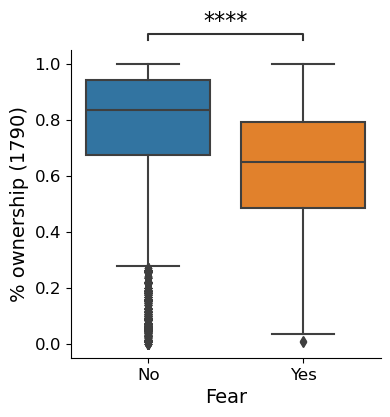

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax=sns.boxplot(data=gdf, x="Fear", y="perpropri1790", order=["No","Yes"])
pairs=[("Yes","No")]
annotator = Annotator(ax, pairs, data=gdf, x="Fear", y="perpropri1790")
# Required descriptors for annotate
custom_long_name = 'T Test'
custom_short_name = 'T Test'
custom_func = scipy.stats.ttest_ind
custom_test = StatTest(custom_func, custom_long_name, custom_short_name)
annotator.configure(test=custom_test, text_format='star', loc='outside')
annotator.apply_and_annotate()
plt.ylabel("% ownership (1790)")
plt.show()

In [17]:
##### Association with ownership (towns of more than 2000 inhabitants)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Yes vs. No: T Test, P_val:2.946e-15 Stat=-7.951e+00


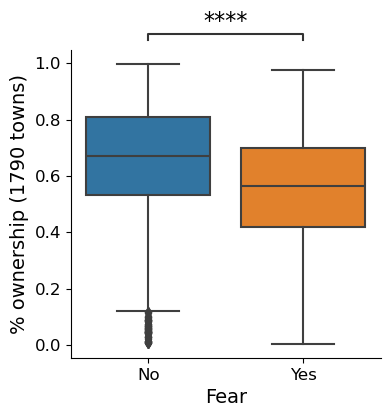

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax=sns.boxplot(data=gdf[gdf.Town], x="Fear", y="perpropri1790", order=["No","Yes"])
pairs=[("Yes","No")]
annotator = Annotator(ax, pairs, data=gdf[gdf.Town], x="Fear", y="perpropri1790")
# Required descriptors for annotate
custom_long_name = 'T Test'
custom_short_name = 'T Test'
custom_func = scipy.stats.ttest_ind
custom_test = StatTest(custom_func, custom_long_name, custom_short_name)
annotator.configure(test=custom_test, text_format='star', loc='outside')
annotator.apply_and_annotate()
plt.ylabel("% ownership (1790 towns)")
plt.show()

#### Multiple logistic regression

In [19]:
df1=gdf[gdf.Town][["logP","revratio1790","perpropri1790","% signed",'ppar',"Fear"]].dropna()

In [20]:
def binarize_fear(x):
    if x=="Yes":
        fear=1
    else:
        fear=0
    return fear

In [21]:
df1.Fear=df1.Fear.apply(lambda x: binarize_fear(x))

In [22]:
X=df1[['logP', 'revratio1790', 'perpropri1790', '% signed', 'ppar']]
Y=df1["Fear"]

In [23]:
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(Y, X)
result = model.fit()

# Print the summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.442478
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   Fear   No. Observations:                 2024
Model:                          Logit   Df Residuals:                     2018
Method:                           MLE   Df Model:                            5
Date:                Thu, 20 Feb 2025   Pseudo R-squ.:                 0.07823
Time:                        13:18:18   Log-Likelihood:                -895.57
converged:                       True   LL-Null:                       -971.58
Covariance Type:            nonrobust   LLR p-value:                 4.959e-31
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -8.2234      1.025     -8.023      0.000     -10.232      -6.215
logP              1.